# Exercice de visualisation

Vous disposez du jeu de données *exercice_dataset.csv* dans le dossier Data du répertoire courant et on vous demande de refaire le graphique ci-dessous. Bonne chance !


<img src="image_graphique.png">

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Data/exercice_dataset.csv",
                 usecols=["Genre", "Studio","Gross % US"],
                 encoding="latin1")
df.head()

,Genre,Studio,Gross % US
0,action,Buena Vista Studios,44.6
1,action,Buena Vista Studios,21.4
2,action,Lionsgate,19.1
3,comedy,Sony,68.7
4,action,Sony,35.6


In [6]:
df.Genre.unique(), df.Studio.unique()

(array(['action', 'comedy', 'adventure', 'horror', 'animation',
        'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
        'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object),
 array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
        'Paramount Pictures', 'WB', 'Weinstein Company',
        'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
        'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
        'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
        'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
        'Dimension Films', 'USA', 'Lionsgate/Summit',
        'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
        'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
        'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
        'New Market Films'], dtype=object))

In [17]:
genres = ['action', 'comedy', 'adventure', 'animation', 'drama']
studios = df.Studio.value_counts().index[:6]

In [18]:
df_fig = df[df.Genre.isin(genres) & df.Studio.isin(studios)]
df_fig

,Genre,Studio,Gross % US
0,action,Buena Vista Studios,44.6
1,action,Buena Vista Studios,21.4
3,comedy,Sony,68.7
4,action,Sony,35.6
5,action,Sony,40.5
...,...,...,...
598,adventure,Universal,39.1
600,adventure,Universal,54.9
602,adventure,Fox,49.0
604,action,Fox,59.5


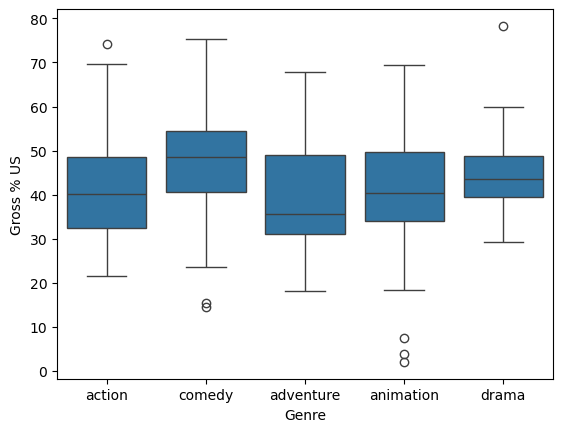

In [21]:
# On teste déjà le boxplot
sns.boxplot(x="Genre", y="Gross % US", data=df_fig);

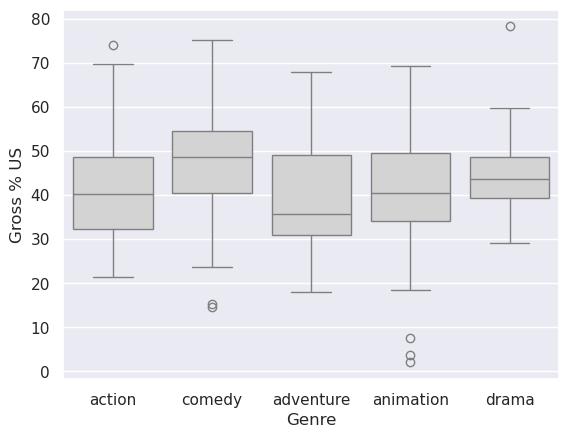

In [29]:
# Problèmes de couleurs : style de seaborn
sns.set(style='darkgrid')
sns.boxplot(x="Genre", y="Gross % US", data=df_fig, color='lightgray');

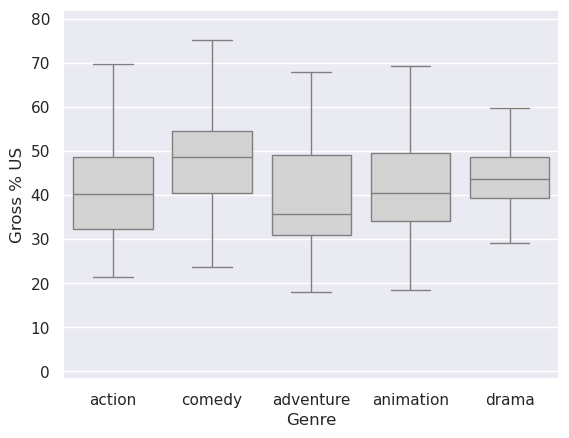

In [30]:
# suppression des outliers
sns.set(style='darkgrid')
sns.boxplot(x="Genre", y="Gross % US", data=df_fig, color='lightgray', fliersize=0);

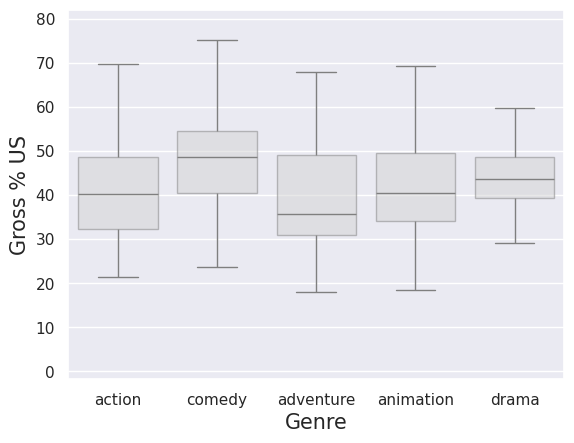

In [47]:
# labels des axes
sns.set(style='darkgrid')
ax = sns.boxplot(x="Genre", y="Gross % US", data=df_fig,
                 color='lightgray', fliersize=0, boxprops=dict(alpha=.5))
ax.set_xlabel("Genre", fontsize=15)
ax.set_ylabel("Gross % US", fontsize=15);

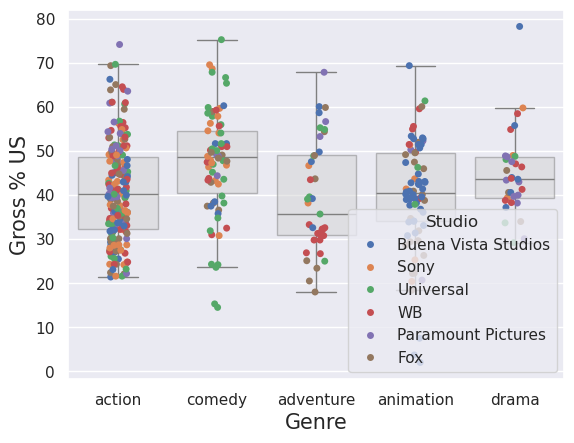

In [48]:
# ajout du stripplot
sns.set(style='darkgrid')

ax = sns.boxplot(x="Genre", y="Gross % US", data=df_fig,
                 color='lightgray', fliersize=0, boxprops=dict(alpha=.5))
ax.set_xlabel("Genre", fontsize=15)
ax.set_ylabel("Gross % US", fontsize=15)

sns.stripplot(x="Genre", y="Gross % US", hue="Studio", data=df_fig);

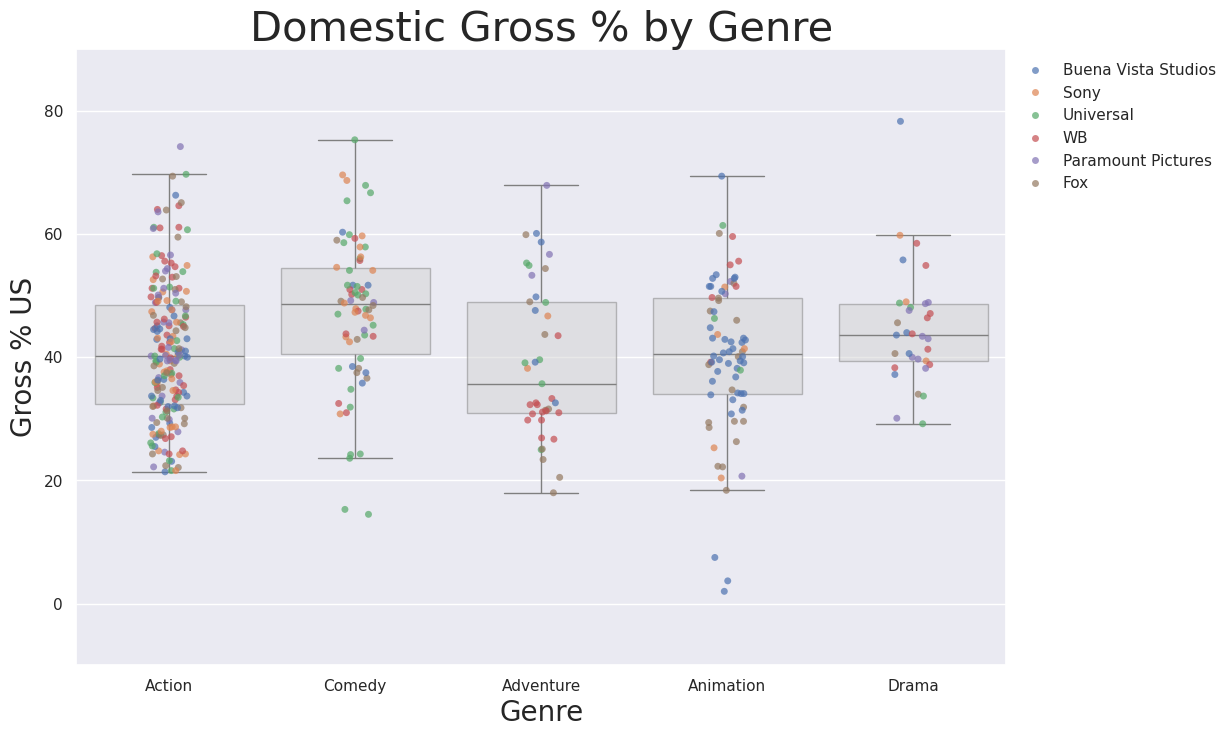

In [70]:
# légende et transparence et fin
sns.set(style='darkgrid')
plt.figure(figsize=(12,8))

ax = sns.boxplot(x="Genre", y="Gross % US", data=df_fig,
                 color='lightgray', fliersize=0, boxprops=dict(alpha=.5))
ax.set_xlabel("Genre", fontsize=20)
ax.set_ylabel("Gross % US", fontsize=20)
ax.set_ylim(-10, 90)
#pour sergueï
ax.set_xticks(ticks=genres, labels=[g.capitalize() for g in genres])

sns.stripplot(x="Genre", y="Gross % US", hue="Studio", data=df_fig,
             alpha=0.7, ax=ax)

ax.legend(bbox_to_anchor = (1,1), frameon=False)
ax.set_title("Domestic Gross % by Genre", fontsize=30);